In [6]:
import xgboost

In [4]:
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import plot_importance
from matplotlib import pyplot


In [5]:
from xgboost import XGBClassifier
# load data
dataset = loadtxt(r'.\pima-indians-diabetes.csv', delimiter=",")
X=dataset[:,0:8]
Y=dataset[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=test_size,random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, Y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate prediction
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.83%


In [7]:
# load data
dataset = loadtxt(r'.\pima-indians-diabetes.csv', delimiter=",")
X=dataset[:,0:8]
Y=dataset[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=test_size,random_state=seed)
# fit model no training data
model = XGBClassifier()
eval_set=[(X_test,Y_test)]
model.fit(X_train, Y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate prediction
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.57274
[1]	validation_0-logloss:0.53462
[2]	validation_0-logloss:0.50815
[3]	validation_0-logloss:0.49274
[4]	validation_0-logloss:0.48162
[5]	validation_0-logloss:0.48037
[6]	validation_0-logloss:0.48404
[7]	validation_0-logloss:0.48366
[8]	validation_0-logloss:0.48571
[9]	validation_0-logloss:0.48744
[10]	validation_0-logloss:0.48764
[11]	validation_0-logloss:0.48601
[12]	validation_0-logloss:0.49566


[13]	validation_0-logloss:0.50184
[14]	validation_0-logloss:0.51328
[15]	validation_0-logloss:0.51348
Accuracy: 79.92%


c:\Users\lia68085\AppData\Local\anaconda3\envs\py3.9\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\lia68085\AppData\Local\anaconda3\envs\py3.9\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


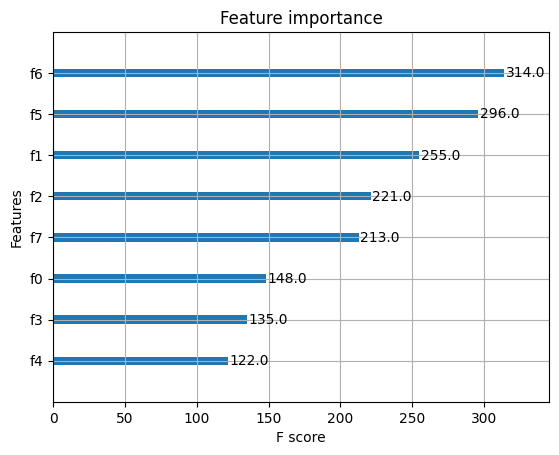

In [8]:
# load data
dataset = loadtxt(r'.\pima-indians-diabetes.csv', delimiter=",")
X=dataset[:,0:8]
y=dataset[:,8]

# fit model no training data
model = XGBClassifier()
model.fit(X, y)
plot_importance(model)
pyplot.show()

In [9]:
# load data
dataset = loadtxt(r'.\pima-indians-diabetes.csv', delimiter=",")
X=dataset[:,0:8]
Y=dataset[:,8]
# split data into train and test sets

# fit model no training data
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean,param in zip(means,params):
    print("%f with: %r" % (mean,param))



Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best: -0.517147 using {'learning_rate': 0.01}
-0.643947 with: {'learning_rate': 0.0001}
-0.620464 with: {'learning_rate': 0.001}
-0.517147 with: {'learning_rate': 0.01}
-0.563045 with: {'learning_rate': 0.1}
-0.637261 with: {'learning_rate': 0.2}
-0.754279 with: {'learning_rate': 0.3}


In [ ]:
xgb1 = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=5,

    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',

    nthread=4,
    scale_pos_weight=1,
    seed=27)